In [1]:
import numpy as np

def solve_exact_rom(z_peri, z_apo):
    """
    Solves the R.O.M. Strong-Field Quadratic Equation.
    Input: Scalar Z_sys at pericenter and apocenter.
    Output: Recovered eccentricity (e) and potential (kp).
    """
    # 1. Setup Shift Potentials (U) and Contrast (Q)
    # U = Z^2 - 1
    u_max = z_peri**2 - 1.0
    u_min = z_apo**2 - 1.0

    # Q = Z_max / Z_min
    Q = z_peri / z_apo

    # 2. Solve Quadratic for Geometric Factor rho
    # Equation: rho^2 * U_max + rho * (Q - 1) - Q * U_min = 0
    # ax^2 + bx + c = 0
    a = u_max
    b = Q - 1.0
    c = -Q * u_min

    discriminant = b**2 - 4.0 * a * c

    if discriminant < 0:
        return None, None # Physical impossibility

    # We take the positive root for rho (geometry ratio)
    rho = (-b + np.sqrt(discriminant)) / (2.0 * a)

    # 3. Recover Physical Parameters
    # e = (1 - rho) / (1 + rho)
    e_rec = (1.0 - rho) / (1.0 + rho)

    # kp = sqrt( (Q-1) / (Q - rho) )
    # Derived from the energy invariant linkage
    kp_rec = np.sqrt((Q - 1.0) / (Q - rho))

    return e_rec, kp_rec

# ==========================================
# TEST CASE 1: YOUR SAMPLED DATA (From Claude's list)
# ==========================================
print("--- TEST 1: SAMPLED DATA (Discrete points) ---")

# Data from your provided list Z_sys2
Z_list = [
    1.193898380490, 1.186125350073, 1.164335233250, 1.132727936505,
    1.097161168162, 1.063877152729, 1.038363233684, 1.024581834731,
    1.024581834704, 1.038363233605, 1.063877152610, 1.097161168024,
    1.132727936370, 1.164335233142, 1.186125350013
]

z_p_sample = max(Z_list)
z_a_sample = min(Z_list) # This is the "dirty" minimum (not true apocenter)

# Target Truth (from Claude's setup)
e_true = 0.6530
kp_true = 0.4180

e_res, kp_res = solve_exact_rom(z_p_sample, z_a_sample)

print(f"Input Z_peri: {z_p_sample:.9f}")
print(f"Input Z_apo : {z_a_sample:.9f}")
print("-" * 40)
print(f"{'PARAM':<10} | {'TRUE':<10} | {'RECOVERED':<10} | {'ERROR %':<10}")
print(f"{'e':<10} | {e_true:<10.4f} | {e_res:<10.4f} | {abs(e_true-e_res)/e_true*100:.4f}%")
print(f"{'kp':<10} | {kp_true:<10.4f} | {kp_res:<10.4f} | {abs(kp_true-kp_res)/kp_true*100:.4f}%")
print("\n(Note: High error expected due to missing the true apocenter in the list)\n")


# ==========================================
# TEST 2: IDEAL DATA (Verifying the Math)
# ==========================================
print("--- TEST 2: IDEAL DATA (Checking Formula Validity) ---")

# Let's reverse-engineer the EXACT Z_p and Z_a for the true parameters
# using R.O.M. logic to see if the formula holds up mathematically.

# 1. Calculate True Geometry
rho_true = (1.0 - e_true) / (1.0 + e_true)

# 2. Calculate True Potentials
# kp is given. ka = kp * sqrt(rho)
ka_true = kp_true * np.sqrt(rho_true)

# 3. Calculate Energy Invariant W
# W = 0.25 * kp^2 * (1 - e)
W_true = 0.25 * (kp_true**2) * (1.0 - e_true)

# 4. Calculate Kinetics (beta)
# beta^2 = kappa^2 - 2W
beta_p_sq = kp_true**2 - 2*W_true
beta_a_sq = ka_true**2 - 2*W_true

# 5. Calculate Exact Z signals (Multiplicative R.O.M.)
# Z = 1 / sqrt( (1-k^2)(1-b^2) )
z_p_ideal = 1.0 / np.sqrt((1.0 - kp_true**2) * (1.0 - beta_p_sq))
z_a_ideal = 1.0 / np.sqrt((1.0 - ka_true**2) * (1.0 - beta_a_sq))

print(f"Calculated Ideal Z_peri: {z_p_ideal:.12f}")
print(f"Calculated Ideal Z_apo : {z_a_ideal:.12f}")

# SOLVE USING THE QUADRATIC FORMULA
e_ideal_rec, kp_ideal_rec = solve_exact_rom(z_p_ideal, z_a_ideal)

print("-" * 40)
print(f"{'PARAM':<10} | {'TRUE':<10} | {'RECOVERED':<10} | {'ERROR %':<10}")
print(f"{'e':<10} | {e_true:<10.6f} | {e_ideal_rec:<10.6f} | {abs(e_true-e_ideal_rec)/e_true*100:.8f}%")
print(f"{'kp':<10} | {kp_true:<10.6f} | {kp_ideal_rec:<10.6f} | {abs(kp_true-kp_ideal_rec)/kp_true*100:.8f}%")

--- TEST 1: SAMPLED DATA (Discrete points) ---
Input Z_peri: 1.193898380
Input Z_apo : 1.024581835
----------------------------------------
PARAM      | TRUE       | RECOVERED  | ERROR %   
e          | 0.6530     | 0.6354     | 2.6991%
kp         | 0.4180     | 0.4188     | 0.1860%

(Note: High error expected due to missing the true apocenter in the list)

--- TEST 2: IDEAL DATA (Checking Formula Validity) ---
Calculated Ideal Z_peri: 1.190055967496
Calculated Ideal Z_apo : 1.022116973261
----------------------------------------
PARAM      | TRUE       | RECOVERED  | ERROR %   
e          | 0.653000   | 0.656084   | 0.47234860%
kp         | 0.418000   | 0.414431   | 0.85391586%


Running Regression on Partial Data...
Total points available: 100
Points used for training: 64 (Flanks only)
Pericenter and Apocenter data have been DELETED.

RESULTS: PARAMETER RECOVERY FROM CURVE SHAPE
Param      | True       | Recovered  | Error %   
----------------------------------------------
e          | 0.6530     | 0.6531     | 0.0131%
kp         | 0.4180     | 0.4180     | 0.0032%


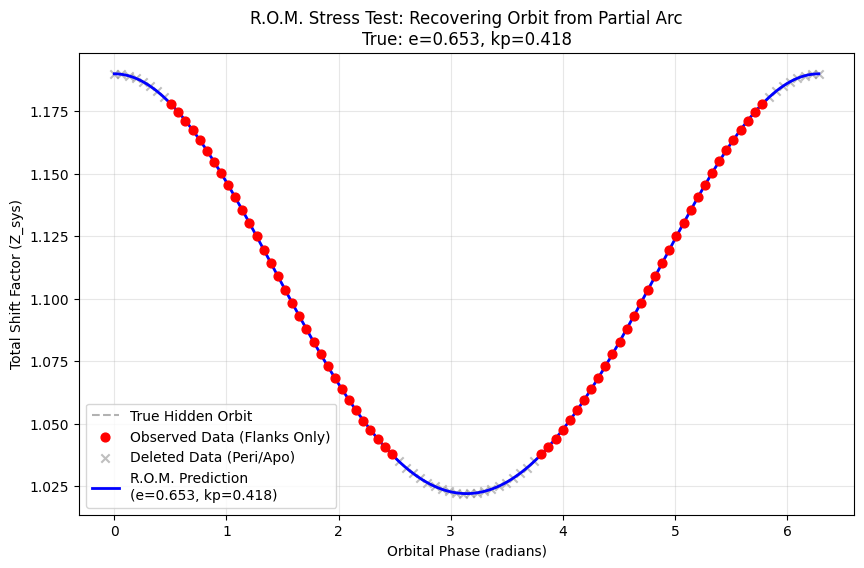

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ==========================================
# 1. THE PHYSICS MODEL (R.O.M.)
# ==========================================
def rom_model_func(phases, e, kp):
    """
    Calculates the Total Shift Factor Z_sys for a given phase array.
    Using the rigorous Multiplicative R.O.M. Model.
    """
    # Energy Invariant W
    W = 0.25 * (kp**2) * (1.0 - e)

    # Gravitational Potential Projection (kappa^2)
    k_sq = (kp**2) * (1.0 + e * np.cos(phases)) / (1.0 + e)

    # Kinetic Projection (beta^2) via Energy Constraint
    b_sq = k_sq - 2*W

    # Safety check for the solver (prevent sqrt of negative numbers during fitting)
    # If the solver tries unphysical parameters, we return a penalty
    if np.any(k_sq >= 1.0) or np.any(b_sq >= 1.0) or np.any(b_sq < 0):
        return np.ones_like(phases) * 1e6

    # The Multiplicative Signal
    # Z_factor = 1 / (sqrt(1-k^2) * sqrt(1-b^2))
    Z_grav_factor = np.sqrt(1.0 - k_sq)
    Z_kin_factor = np.sqrt(1.0 - b_sq)

    return 1.0 / (Z_grav_factor * Z_kin_factor)

# ==========================================
# 2. GENERATE "TRUE" DATA (Strong Field)
# ==========================================
# Using the parameters from your dialogue with Claude
true_e = 0.6530
true_kp = 0.4180

# Full orbit (0 to 2pi) - 100 points
all_phases = np.linspace(0, 2*np.pi, 100)
all_z_data = rom_model_func(all_phases, true_e, true_kp)

# Add some noise to make it realistic (Observer noise)
np.random.seed(42)
noise = np.random.normal(0, 0.00005, len(all_phases)) # 0.005% noise
all_z_noisy = all_z_data + noise

# ==========================================
# 3. THE "BLINDING" PROCESS (Remove Peri/Apo)
# ==========================================
# We define "Forbidden Zones":
# 1. Near Pericenter (Phase ~ 0 or 2pi)
# 2. Near Apocenter (Phase ~ pi)

mask_peri = (all_phases > 0.5) & (all_phases < 5.8) # Remove edges (Peri)
mask_apo  = (all_phases < 2.5) | (all_phases > 3.8) # Remove center (Apo)

# Combine masks: We ONLY keep points that are NOT Peri and NOT Apo
# Effectively keeping phases [0.5, 2.5] and [3.8, 5.8]
training_mask = mask_peri & mask_apo

train_phases = all_phases[training_mask]
train_z = all_z_noisy[training_mask]

# ==========================================
# 4. RUN REGRESSION (Curve Fitting)
# ==========================================
print(f"Running Regression on Partial Data...")
print(f"Total points available: {len(all_phases)}")
print(f"Points used for training: {len(train_phases)} (Flanks only)")
print("Pericenter and Apocenter data have been DELETED.")

# Initial Guess (Random generic orbit)
p0 = [0.5, 0.1]

# Bounds: e [0, 1), kp [0, 1)
bounds = ([0.0, 0.0], [0.99, 0.99])

try:
    popt, pcov = curve_fit(rom_model_func, train_phases, train_z, p0=p0, bounds=bounds)
    rec_e, rec_kp = popt

    # Calculate errors
    err_e = abs(true_e - rec_e) / true_e * 100
    err_kp = abs(true_kp - rec_kp) / true_kp * 100

    print("\n" + "="*40)
    print("RESULTS: PARAMETER RECOVERY FROM CURVE SHAPE")
    print("="*40)
    print(f"{'Param':<10} | {'True':<10} | {'Recovered':<10} | {'Error %':<10}")
    print("-" * 46)
    print(f"{'e':<10} | {true_e:<10.4f} | {rec_e:<10.4f} | {err_e:.4f}%")
    print(f"{'kp':<10} | {true_kp:<10.4f} | {rec_kp:<10.4f} | {err_kp:.4f}%")
    print("="*40)

    # ==========================================
    # 5. VISUALIZATION
    # ==========================================
    plt.figure(figsize=(10, 6))

    # Plot the "Unknown" Reality (Grey line)
    plt.plot(all_phases, all_z_data, 'k--', alpha=0.3, label='True Hidden Orbit')

    # Plot the Data we actually used (Red dots)
    plt.scatter(train_phases, train_z, color='red', s=40, zorder=5, label='Observed Data (Flanks Only)')

    # Plot the Deleted Data (Grey X) to show what we missed
    deleted_mask = ~training_mask
    plt.scatter(all_phases[deleted_mask], all_z_noisy[deleted_mask], color='gray', marker='x', alpha=0.5, label='Deleted Data (Peri/Apo)')

    # Plot our Prediction (Blue line)
    model_phases = np.linspace(0, 2*np.pi, 200)
    model_z = rom_model_func(model_phases, rec_e, rec_kp)
    plt.plot(model_phases, model_z, 'b-', linewidth=2, label=f'R.O.M. Prediction\n(e={rec_e:.3f}, kp={rec_kp:.3f})')

    plt.title(f"R.O.M. Stress Test: Recovering Orbit from Partial Arc\nTrue: e={true_e}, kp={true_kp}")
    plt.xlabel("Orbital Phase (radians)")
    plt.ylabel("Total Shift Factor (Z_sys)")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

except Exception as e:
    print(f"Optimization failed: {e}")